# Case study on Pre-processing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment

In [2]:
data = pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [3]:
data = pd.read_csv("titanic_dataset.csv",index_col="PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [11]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Fill in all the missing values present in all the columns in the dataset

In [12]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

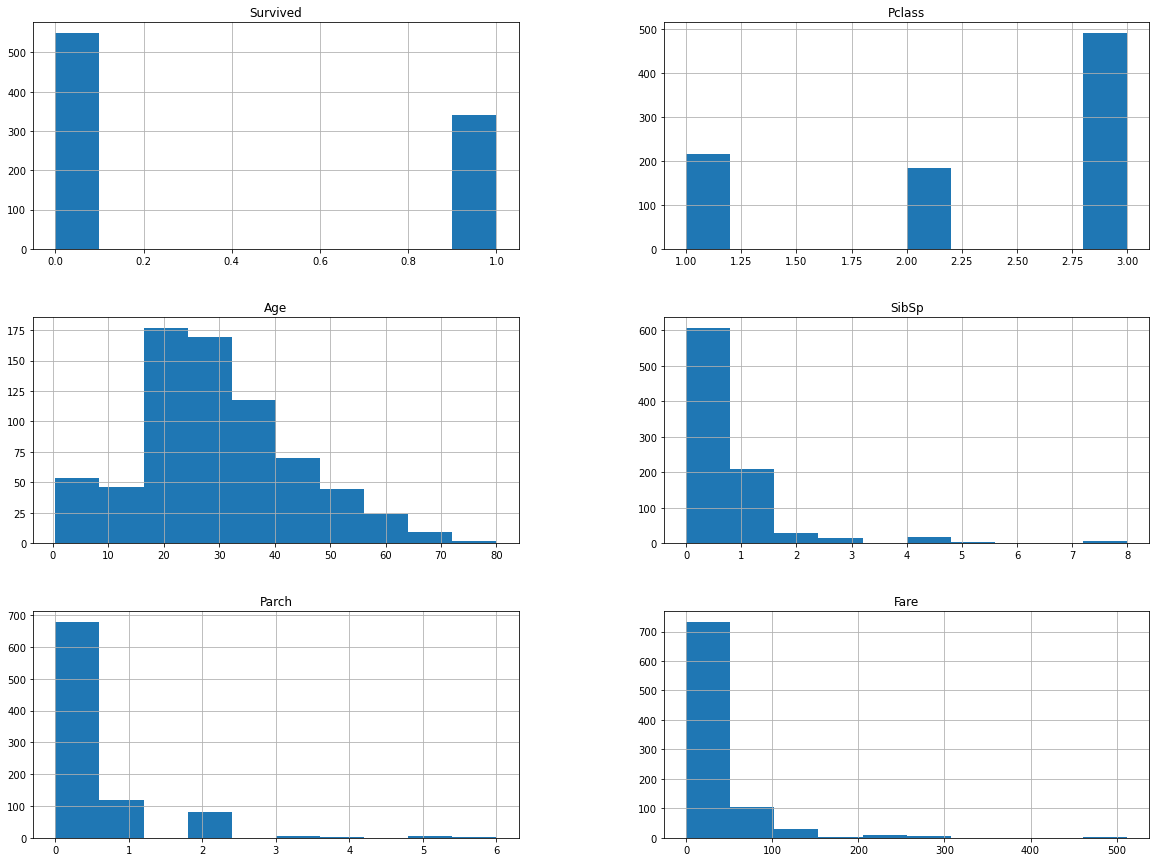

In [14]:
fregraph=data.select_dtypes(include=["float","int"])
fregraph.hist(figsize=(20,15))
plt.show()

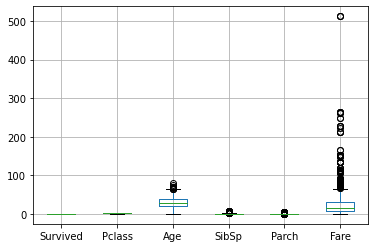

In [15]:
data.boxplot()
plt.show()

outlier in age,so we are using median method is used to fill missing value in age

In [16]:
data["Age"]=data["Age"].fillna(data["Age"].median())

cabin data doesn't make any impact , we are removing Cabin column from the dataset

In [17]:
data.drop(['Cabin'],inplace=True,axis=1)

In [18]:
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode())

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [20]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


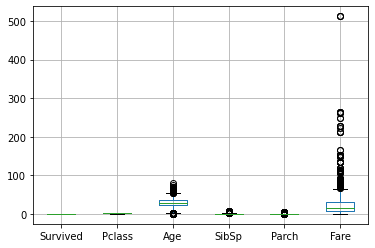

In [21]:
data.boxplot()
plt.show()

Age,Pclass,SibSp,Parch,Fare are having outliers

Handling outliers in Age

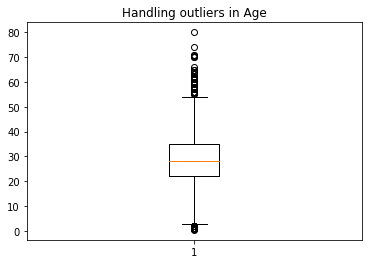

In [22]:
plt.boxplot(data["Age"])
plt.title("Handling outliers in Age")
plt.show()

In [23]:
Q1=np.percentile(data['Age'],25, interpolation ='midpoint')
Q2=np.percentile(data['Age'],50, interpolation ='midpoint')
Q3=np.percentile(data['Age'],75, interpolation ='midpoint')

In [24]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [25]:
IQR =Q3-Q1
IQR

13.0

In [26]:
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

2.5
54.5


In [27]:
outlier = []
for x in data["Age"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [28]:
ind_1 =data["Age"]>upper_limit
data.loc[ind_1].index


Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [29]:
ind_2 = data["Age"]<low_limit
data.loc[ind_2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [30]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

In [31]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace =True)

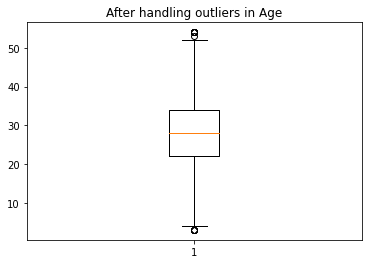

In [32]:
plt.boxplot(data["Age"])
plt.title("After handling outliers in Age")
plt.show()

Handling outliers in SibSp

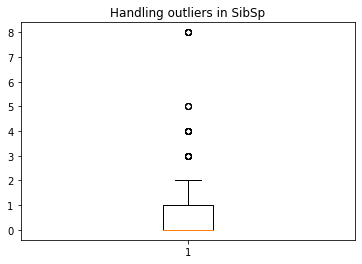

In [33]:
plt.boxplot(data["SibSp"])
plt.title("Handling outliers in SibSp")
plt.show()

In [34]:
Q1=np.percentile(data['SibSp'],25, interpolation ='midpoint')
Q2=np.percentile(data['SibSp'],50, interpolation ='midpoint')
Q3=np.percentile(data['SibSp'],75, interpolation ='midpoint')

In [35]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [36]:
IQR =Q3-Q1
IQR

1.0

In [37]:
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

-1.5
2.5


In [38]:
outlier = []
for x in data["SibSp"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [39]:
ind_1 =data["SibSp"]>upper_limit
data.loc[ind_1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [40]:
data.drop(data.loc[ind_1].index,inplace =True)

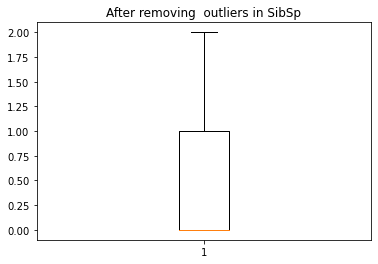

In [41]:
plt.boxplot(data["SibSp"])
plt.title("After removing  outliers in SibSp")
plt.show()

Handling outliers in Parch

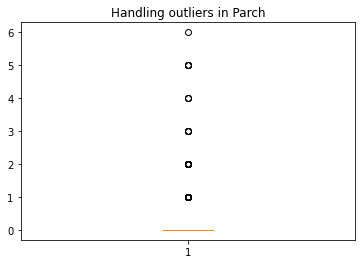

In [42]:
plt.boxplot(data["Parch"])
plt.title("Handling outliers in Parch")
plt.show()

In [43]:
Q1=np.percentile(data['Parch'],25, interpolation ='midpoint')
Q2=np.percentile(data['Parch'],50, interpolation ='midpoint')
Q3=np.percentile(data['Parch'],75, interpolation ='midpoint')

In [44]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [45]:
IQR =Q3-Q1
IQR

0.0

In [46]:
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

0.0
0.0


In [47]:
outlier = []
for x in data["Parch"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[2, 1, 5, 5, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 2]


In [48]:
data["Parch"]>upper_limit
data.loc[data["Parch"]>upper_limit].index

Int64Index([  9,  11,  14,  26,  44,  59,  66,  87,  94,  98,
            ...
            853, 854, 856, 857, 859, 870, 872, 881, 886, 889],
           dtype='int64', name='PassengerId', length=144)

In [49]:
data.drop(data.loc[data["Parch"]>upper_limit].index,inplace=True)

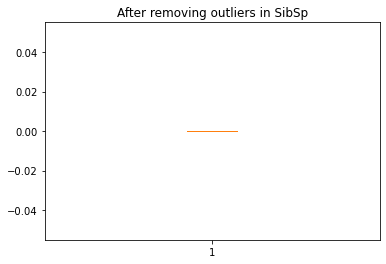

In [50]:
plt.boxplot(data["Parch"])
plt.title("After removing outliers in SibSp")
plt.show()

Handling outliers in Fare

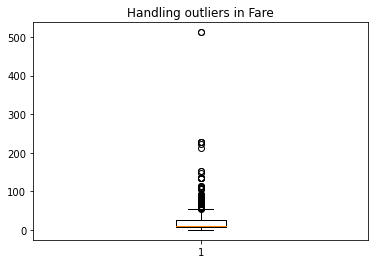

In [51]:
plt.boxplot(data["Fare"])
plt.title("Handling outliers in Fare")
plt.show()

In [52]:
Q1=np.percentile(data['Fare'],25, interpolation ='midpoint')
Q2=np.percentile(data['Fare'],50, interpolation ='midpoint')
Q3=np.percentile(data['Fare'],75, interpolation ='midpoint')

In [53]:
print(Q1)
print(Q2)
print(Q3)

7.8542
10.0083
26.0


In [54]:
IQR =Q3-Q1
IQR

18.1458

In [55]:
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

-19.364500000000003
53.2187


In [56]:
outlier = []
for x in data["Fare"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 56.4958, 61.175, 73.5, 79.2, 66.6, 56.4958, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 135.6333, 78.85, 91.0792, 110.8833, 108.9, 56.9292, 83.1583, 135.6333, 133.65, 66.6, 134.5, 69.3, 55.4417, 135.6333, 82.1708, 227.525, 73.5, 113.275, 90.0, 55.9, 89.1042, 91.0792, 90.0, 78.2667, 86.5, 108.9, 56.4958, 59.4, 93.5, 221.7792, 106.425, 106.425, 227.525, 55.9, 78.2667, 56.9292, 153.4625, 77.9583, 69.3, 56.4958, 76.7292, 73.5, 133.65, 73.5, 76.7292, 57.0, 56.4958, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 86.5, 77.9583, 57.0, 79.2, 56.4958, 56.4958, 89.1042]


In [57]:
ind_1 =data["Fare"]>upper_limit
data.loc[ind_1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  75,  93, 121, 140, 152, 170,
            216, 219, 225, 231, 246, 257, 258, 259, 270, 291, 292, 307, 308,
            310, 311, 326, 335, 337, 338, 370, 371, 374, 376, 381, 386, 394,
            413, 435, 454, 485, 487, 497, 505, 506, 510, 514, 521, 528, 538,
            545, 558, 578, 592, 600, 610, 628, 642, 644, 646, 656, 661, 666,
            682, 691, 693, 701, 709, 717, 731, 738, 742, 760, 766, 782, 790,
            827, 839, 850],
           dtype='int64', name='PassengerId')

In [58]:
data.drop(data.loc[ind_1].index,inplace=True)

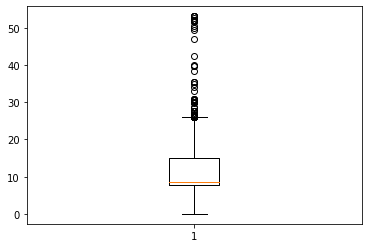

In [59]:
plt.boxplot(data["Fare"])
plt.show("After removing outliers in Fare")
plt.show()

After handling outliers in the dataset data shape (891,11) reduced to

In [60]:
data.shape

(561, 10)

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

First we are converting all categorical data to numerical data

In [62]:
embarked = pd.get_dummies(data['Embarked'],drop_first=True)
embarked.head()

,Q,S
PassengerId,,
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


In [63]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
PassengerId,
1,1
3,0
4,0
5,1
6,1


In [64]:
data.drop(['Sex','Embarked','Name','Ticket'],axis =1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


In [65]:
data=pd.concat([data,sex,embarked],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
6,0,3,28.0,0,0,8.4583,1,1,0


In [66]:
from sklearn import preprocessing

In [67]:
X=data.drop('Survived',axis=1)
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [68]:
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,1.0,0.346939,0.5,0.0,0.136535,1.0,0.0,1.0
1,1.0,0.428571,0.0,0.0,0.149247,0.0,0.0,1.0
2,0.0,0.612245,0.5,0.0,1.000000,0.0,0.0,1.0
3,1.0,0.612245,0.0,0.0,0.151601,1.0,0.0,1.0
4,1.0,0.469388,0.0,0.0,0.159290,1.0,1.0,0.0


In [69]:
X.describe()

,0,1,2,3,4,5,6,7
count,561.000000,561.000000,561.000000,561.0,561.000000,561.000000,561.000000,561.000000
mean,0.760250,0.493288,0.095365,0.0,0.258530,0.752228,0.114082,0.750446
std,0.358577,0.172715,0.220178,0.0,0.198880,0.432104,0.318195,0.433141
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.387755,0.000000,0.0,0.146422,1.000000,0.000000,1.000000
50%,1.000000,0.469388,0.000000,0.0,0.159290,1.000000,0.000000,1.000000
75%,1.000000,0.551020,0.000000,0.0,0.283427,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
